In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
import matplotlib.pyplot as plt

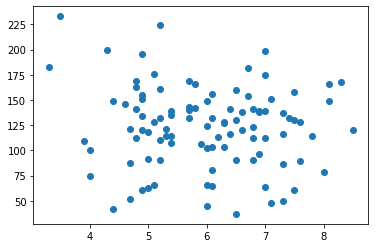

In [9]:
plt.scatter(df['cgpa'],df['iq'])

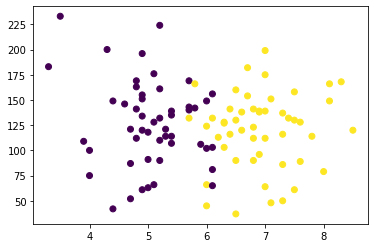

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [14]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [38]:
X_train

,Unnamed: 0,cgpa
9,9,5.1
70,70,6.3
1,1,5.9
16,16,5.2
49,49,5.4
...,...,...
71,71,6.1
28,28,5.2
2,2,5.3
92,92,5.2


In [20]:
y_train

54    1
72    1
16    0
78    0
51    0
     ..
32    1
56    0
42    1
27    1
86    0
Name: placement, Length: 90, dtype: int64

In [35]:
X_test

NameError: ignored

In [22]:
y_test

29    1
23    0
90    1
8     0
85    1
19    0
3     1
65    1
73    0
11    1
Name: placement, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.fit_transform(X_test)

In [47]:
X_test

array([[-0.92403701,  2.04204854],
       [-0.83977832, -0.4918803 ],
       [-0.89595078, -0.34282567],
       [-0.67126093, -0.93904422],
       [ 0.73305064, -0.04471639],
       [ 0.14323978, -0.93904422],
       [ 1.77224119,  0.25339288],
       [-0.44657108,  0.84961144],
       [ 1.71606873,  0.99866607],
       [-0.58700223, -1.38620813]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression()

In [49]:
#Model_Training:
clf.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [51]:
y_test

3     1
6     0
4     0
12    0
62    0
41    0
99    1
20    1
97    1
15    0
Name: placement, dtype: int64

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred)

0.9

In [62]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


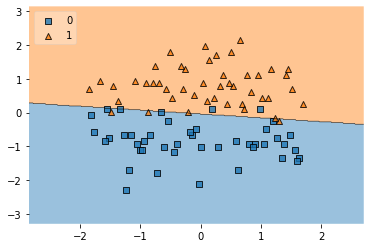

In [65]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [66]:
import pickle

In [67]:
pickle.dump(clf,open('model.pkl','wb'))